<a href="https://colab.research.google.com/github/LCR2001/Kaggle/blob/main/Fashion_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESS CASE

Target Class - 10개
 - { T-Shirt/Top , Trouser , Pullover , Dress , Coat , Sandal , Shirt , Sneaker , Bag , Ankle Boot }
 - 0 => T-shirt/top
 - 1 => Trouser
 - 2 => Pullover
 - 3 => Dress
 - 4 => Coat
 - 5 => Sandal
 - 6 => Shirt
 - 7 => Sneaker
 - 8 => Bag
 - 9 => Ankle boot

# IMPROVING DATA
1. 총 70,000개의 이미지 세트
  - 학습데이터 세트 : 60,000개
  - 테스트데이터 세트 : 10,000개
  - 28x28 grayscale => Total 784개의 픽셀
2. GrayScale (흑백사진)
  - 0~255로 색상을 표현
  - 0 : black, 255 : white
  - ex. 11111111 (: binary value_8-bit) = 255(: decimal value)

# IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
fashion_train_df = pd.read_csv('/content/fashion-mnist_train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

# VISUALIZTION

In [3]:
# 모든 이미지에 대한 픽셀이 표현되어 있음을 알 수 있음
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
# 학습 배열&테스트 배열 만들기 => for.배열 탐색 및 데이터 시각화
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [10]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

1.0

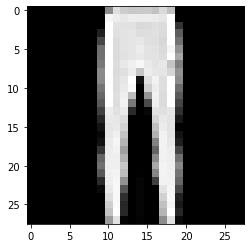

In [12]:
# 이미지 살펴보기 -> 무작위로(random함수 활용)
i = random.randint(1,60000) 

# 행은 1개 => i (무작위로), 열은 모두 다 => 1: (0은 label값이므로 pixel만을 모으기 위해서는 1부터)
# 이미지 사이즈에 맞춰서 차원 재배열 => (28,28)
plt.imshow(training[i,1:].reshape(28,28))

# 흑백처리 => cmap = 'gray'
plt.imshow(training[i,1:].reshape(28,28), cmap = 'gray')

# label값은 열의 첫번째에 존재 => 0
label = training[i,0]
label

 - 0 => T-shirt/top
 - 1 => Trouser
 - 2 => Pullover
 - 3 => Dress
 - 4 => Coat
 - 5 => Sandal
 - 6 => Shirt
 - 7 => Sneaker
 - 8 => Bag
 - 9 => Ankle boot

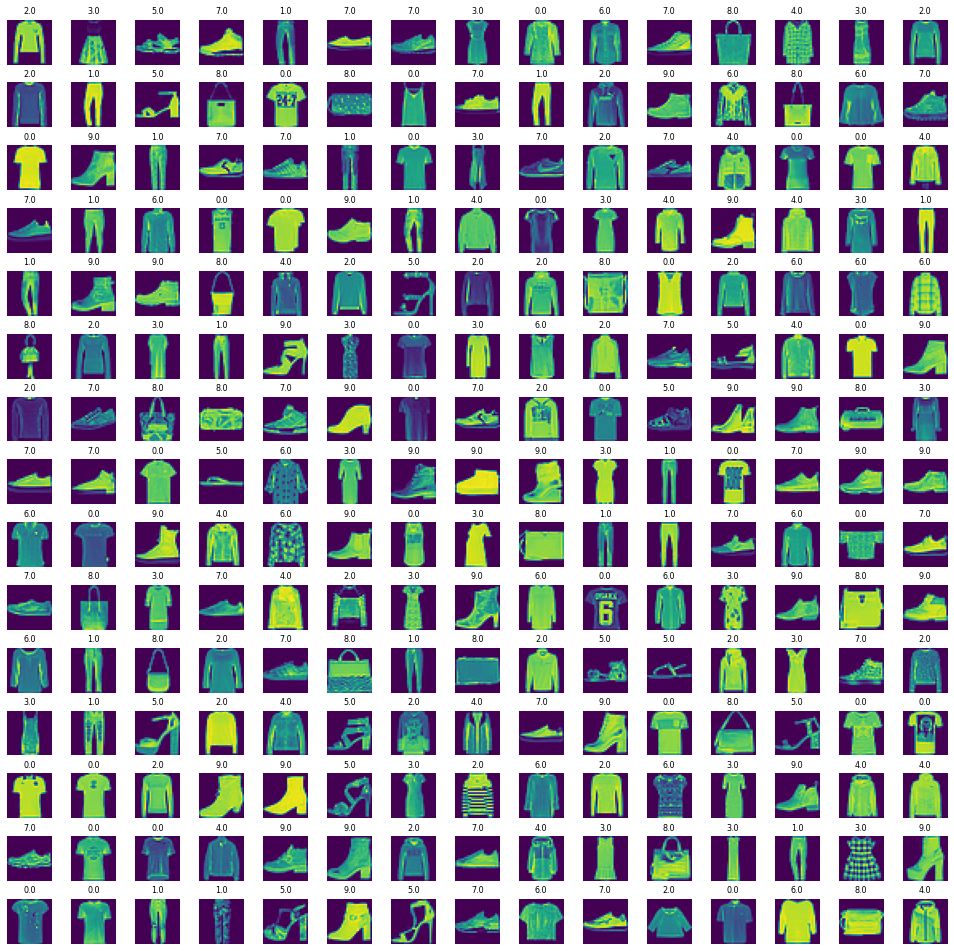

In [13]:
# 격자 만들기(15x15로) 
W_grid = 15
L_grid = 15

# 수치 크기 지정 => figsize(17,17)
# fig : figure = 데이터가 담기는 프레임. 그래프가 담길 수 있는 액자 같은 역할
# ax : axes = 실제 데이터가 그려지는 캔버스 , 모든 plot은 이 axes 위에서 그려져야 함 => 변수
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# 배열x축 = 15x15 = 225 배열로 평탄화 => ravel() : 다차원 -> 1차원
axes = axes.ravel()
n_training = len(training)

# 루프 : 0~255
for i in np.arange(0, W_grid * L_grid):
  # 무작위 변수 설정
  index = np.random.randint(0, n_training)

  axes[i].imshow(training[index, 1:].reshape(28,28))
  axes[i].set_title(training[index, 0], fontsize = 8)

  # 축 => 'off' 설정 : 이미지 주위에 픽셀 수가 표시되는 것 방지
  axes[i].axis('off')

# 이미지 사이의 높이 조정 => hspace
plt.subplots_adjust(hspace = 0.4)


# TRAINING THE MODEL

## 컨볼루션 신경망(CNN; Convolutional Neural Network)_합성곱신경망
 
  - 주로 시각적 이미지를 분석하는 데 사용되는 알고리즘
  
  - 사용분야 - 휴대폰 잠금해제 인식, 자율주행
 1. 컨볼루션(Convolution)_합성곱
    
     시스템의 출력을 구할 때 쓰는 하나의 연산 ( 한 함수를 반전(천이)시키고 이동시켜가며 원함수의 교차지역에 대한 값을 곱하여 구간에 대해 적분하는 것)

 2. 컨볼루션 신경망_합성곱 신경망
    
    - 컨볼루션 + sub-sampling을 반복하여 데이터양을 줄이고 왜곡시켜 신경망에서 분류하도록 하는 것
    
    - 일종의 커널 행렬를 사용하여 이미지를 스캔 및 제공하며 특정 효과를 얻기 위해 필터를 적용 -> 특징 맵(Feature Maps)생성
   
    - 일반 신경망 + Convolution Layer + Pooling Layer
 - 단계
   
     지역 수용 영역 -> 컨볼루션 -> 풀링 -> 평탄화된 값을 신경망에 입력

     2.1. Feature Detector (특징 감지기)

  이미지에 적용하여 컨볼루션 과정의 출력인 특징 맵을 얻음
   -  Feature Maps

     이미지에 특징 탐지기를 집어 넣어 실행하여 이미지에서 특징 감지기를 실행하는 과정의 출력

 3. ReLU 활성화 함수
  - ReLU 

     정류 선형 유닛
  - ReLU Layer

     특징맵에 비선형성을 추가 => 특징맵의 희소성(sparsity)과 특징의 산포 정도(scatter)를 강화함
  - 과정
    
     특징 감지 과정 직후 적용됨(= 컨볼루션 적용 이후, 풀링 이전) -> 
  - 적용 방법 
    : [ 양수 -> 그대로 : f(y) = y  / 음수 -> 0 : f(y) =0 ] 으로 변환 => 0보다 작은 값을 0으로 만들어 희소해지게 하고 양수를 눈에 띄게 하는 방법 
    : 즉, 이미지에 걸쳐 산포가 되게 하는 방법

 3-1. Sigmoid 활성화 함수
     
      값을 포화상태 or 안정되게 만들어줌 -> 따라서, 컨볼루션 신경망에서는(특히, 특징 감지 과정 이후) 경사를 보존해야 하므로 사용X
     : 네트워크 말단에서는 사용 -> 값을 0,1로만 만들기 위해서

 4. Pooling 풀링 _ Down-Sampling
    
     이미지의 특징을 동일하게 보존한 채로 공간적인 크기를 축소시키기 위한 작업
   - 종류 
   
     평균 풀링, 맥스 풀링, 최소 풀링, etc
   - Stride(스트라이드)
     
     입력 데이터에 필터를 씌울 때, 이동할 간격을 조절하는 것
  4-1. 이미지 인식 분야 - 주로 맥스풀링(MaxPooling) 사용 
    
     해당 영역에서 최댓값으로 추려 전체적인 특징 맵의 크기를(차원수) 축소하는 방법
  - 특징
  
      - 특징맵의 차원수를 축소시킴 ->  가장 두드러지는 값, 눈에 띄는 특징만을 보존함 (즉, 특징은 보존되지만 훨씬 응축된 형태로 표현됨)    
      - 대부분의 특징을 보존함 -> 모델의 일반화에 도움이 됨

 5. Flattening 평탄화

     고차원의 이미지를 하나의 배열로 만들어 인공 신경망에 제공



In [14]:
# target 열만 제외하고 지정 -> 1:
# 정규화 진행 - > /255
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [15]:
# 검증(validation) 데이터 세트 만들기
# 검증 데이터 : 학습 중에 사용할 데이터 세트의 일종으로 모델의 일반화를 도움
# -> 모델의 과적합 (특히 데이터 세트에만 적합되는 상황)을 방지
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2, random_state = 12345 )

In [16]:
X_train.shape

(48000, 784)

In [17]:
y_train.shape

(48000,)

In [18]:
# 컨볼루션 신경망이 수용할 데이터로 형 변환
# 행렬 형식 -> (28,28,1)인 이미지 형식으로 재구성
# 컨볼루션 신경망에 이미지로 공급 가능
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
# 28,28,1에서 1 -> 기본적으로 흑백 이미지라는 의미 
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_validate.shape

(12000, 28, 28, 1)

In [22]:
# 모델 학습 시작
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
# 네트워크를 순차적인 형태로 구축해야 하므로 -> sequential()
cnn_model = Sequential()

# 커널 수 지정(특성 탐지기 수) -> Conv2D_32개 커널, 크기는 3,3 / 입력 형태 지정 -> input_shape / 활성화함수 지정 -> activation
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

#풀링 레이어 지정 -> MaxPooling2D / pool크기 지정 -> pool_size
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

# 모델 평탄화 단계
# 
cnn_model.add(Dropout(0.25))

# 평탄화 레이어 추가 -> 특성이 하나의 단일 배열로 평탄화됨
# => 이를 완전 연결 컨볼루션 신경망에 공급 가능
cnn_model.add(Flatten())

In [24]:
# 밀집 함수 추가 -> Dense
# 출력 사이에 포함시키려는 은닉 레이어 추가 - ReLU함수 활용
# 차원 지정 -> units
cnn_model.add(Dense(units = 32, activation = 'relu'))

# 출력 차원 지정 :10 -> class가 10개이므로! - sigmoid함수 활용 (10개의 클래스 중 하나를 선택하기 위해)
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [25]:
# 이진분류가 아니므로 '범주 교차 엔트로피'활용
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
# 모델 적합시키기
# 가중치 갱신할 횟수 지정 -> epochs
epochs = 50

# CNN모델에 학습 -> fit
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = epochs, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 10s 9ms/step - loss: 1.2629 - accuracy: 0.5964 - val_loss: 0.7202 - val_accuracy: 0.7391
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 0.6733 - accuracy: 0.7565 - val_loss: 0.6146 - val_accuracy: 0.7695
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.5873 - accuracy: 0.7871 - val_loss: 0.5461 - val_accuracy: 0.8034
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5449 - accuracy: 0.8027 - val_loss: 0.5069 - val_accuracy: 0.8232
Epoch 5/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5204 - accuracy: 0.8136 - val_loss: 0.4877 - val_accuracy: 0.8266
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4994 - accuracy: 0.8196 - val_loss: 0.4718 - val_accuracy: 0.8326
Epoch 7/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4847 - accuracy: 0.8231 - val_loss: 0.4551 - val_accuracy: 0.8370
Epoch 8/50
94/94 [=

# EVALUATING THE MODEL

In [27]:
evaluation = cnn_model.evaluate(X_test, y_test)
# 정확도 반환
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8766
Test Accuracy : 0.877


In [28]:
# 예측
predicted_classes = cnn_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# 25개 이미지 추출 -> 5x5 격자 만들기 & 12x12 크기로 설정
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
# axis 배열 평탄하게 만들기 -> ravel()
axes = axes.ravel()

#0~25까지를 for루프에 지정
for i in np.arange(0, L*W):
  # 28x28 형식으로 재구성된 이미지 제시
  axes[i].imshow(X_test[i].reshape(28,28))
  # 예측 레이블 값값과 실제 레이블 값 순서대로 제시
  axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
  # 픽셀의 수나 차원 비활성화 -> off
  axes[i].axis('off')

# 폭 조절 -> 0.5
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)
# 각 레이블에 대해서 값을 알맞게 예측한 건 수 제시시

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Calss {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

# 모델 개선방법
- 필터 or 커널수 증가
- 특징 탐지기 증가
- 드롭아웃 (Dropout)
  - 드롭아웃의 실행 = 형성의 원리
  - 신경망에서 유닛을 제외하는 데 사용될 수 있음
  - 학습 중에서 샘플들 중 일부를 뽑아 연결을 끊거나 파괴하는 것 (즉, 더 나은 학습을 위해 필요없는 과정을 없애는 것)
  - 즉, 신경망의 과적합을 줄이기 위한 정규화 기법